In [25]:
# Importation des librairies de base necessaire
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns


# Configuration des graphiques
sns.set(style="whitegrid")

# ici j'importe les donnees depuis mon emplacement sur google colab
from google.colab import files
uploaded = files.upload()

# Chargement des donnees
df = pd.read_csv("dataset_clients_orange.csv", encoding='latin1')

# Affichage du tableaux
df


Saving dataset_clients_orange.csv to dataset_clients_orange (1).csv


,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
0,10001,56,Sud-Ouest,prépayé,39,2363,29,2362
1,10002,69,Centre,prépayé,220,1300,41,6045
2,10003,46,Littoral,prépayé,124,1612,36,4624
3,10004,32,Littoral,postpayé,57,1966,29,7540
4,10005,60,Sud-Ouest,prépayé,135,790,27,4654
...,...,...,...,...,...,...,...,...
995,10996,60,Centre,prépayé,241,2226,26,7199
996,10997,64,Littoral,prépayé,111,830,40,1000
997,10998,62,Nord-Ouest,prépayé,156,1846,33,5934
998,10999,35,Adamaoua,prépayé,272,1197,49,1436


voir les type des colonnes et leurs nombres

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   client_id        1000 non-null   int64 
 1   age              1000 non-null   int64 
 2   region           1000 non-null   object
 3   forfait_type     1000 non-null   object
 4   appels_min       1000 non-null   int64 
 5   data_mo          1000 non-null   int64 
 6   sms_envoyes      1000 non-null   int64 
 7   montant_facture  1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB


Statistique de base

In [27]:
df.describe()

,client_id,age,appels_min,data_mo,sms_envoyes,montant_facture
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10500.500000,43.81900,205.918000,1509.689000,29.842000,5069.027000
std,288.819436,14.99103,97.219179,490.448291,5.453511,2720.937526
min,10001.000000,18.00000,0.000000,0.000000,15.000000,1000.000000
25%,10250.750000,31.00000,138.000000,1179.000000,26.000000,2960.250000
50%,10500.500000,44.00000,205.000000,1501.500000,30.000000,4973.500000
75%,10750.250000,56.00000,268.250000,1841.500000,33.000000,6977.250000
max,11000.000000,69.00000,463.000000,3096.000000,49.000000,14338.000000


Recherchon s'il y a des valeurs manquante

In [28]:
df.isnull().sum()

,0
client_id,0
age,0
region,0
forfait_type,0
appels_min,0
data_mo,0
sms_envoyes,0
montant_facture,0


Voir s'il y a des doublons

In [29]:
df.duplicated().sum()

np.int64(0)

# Nouvelle section
VISUALISATION DES DONNEES

/tmp/ipython-input-30-1371707984.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='forfait_type', y='montant_facture', data=df, palette='Set2')


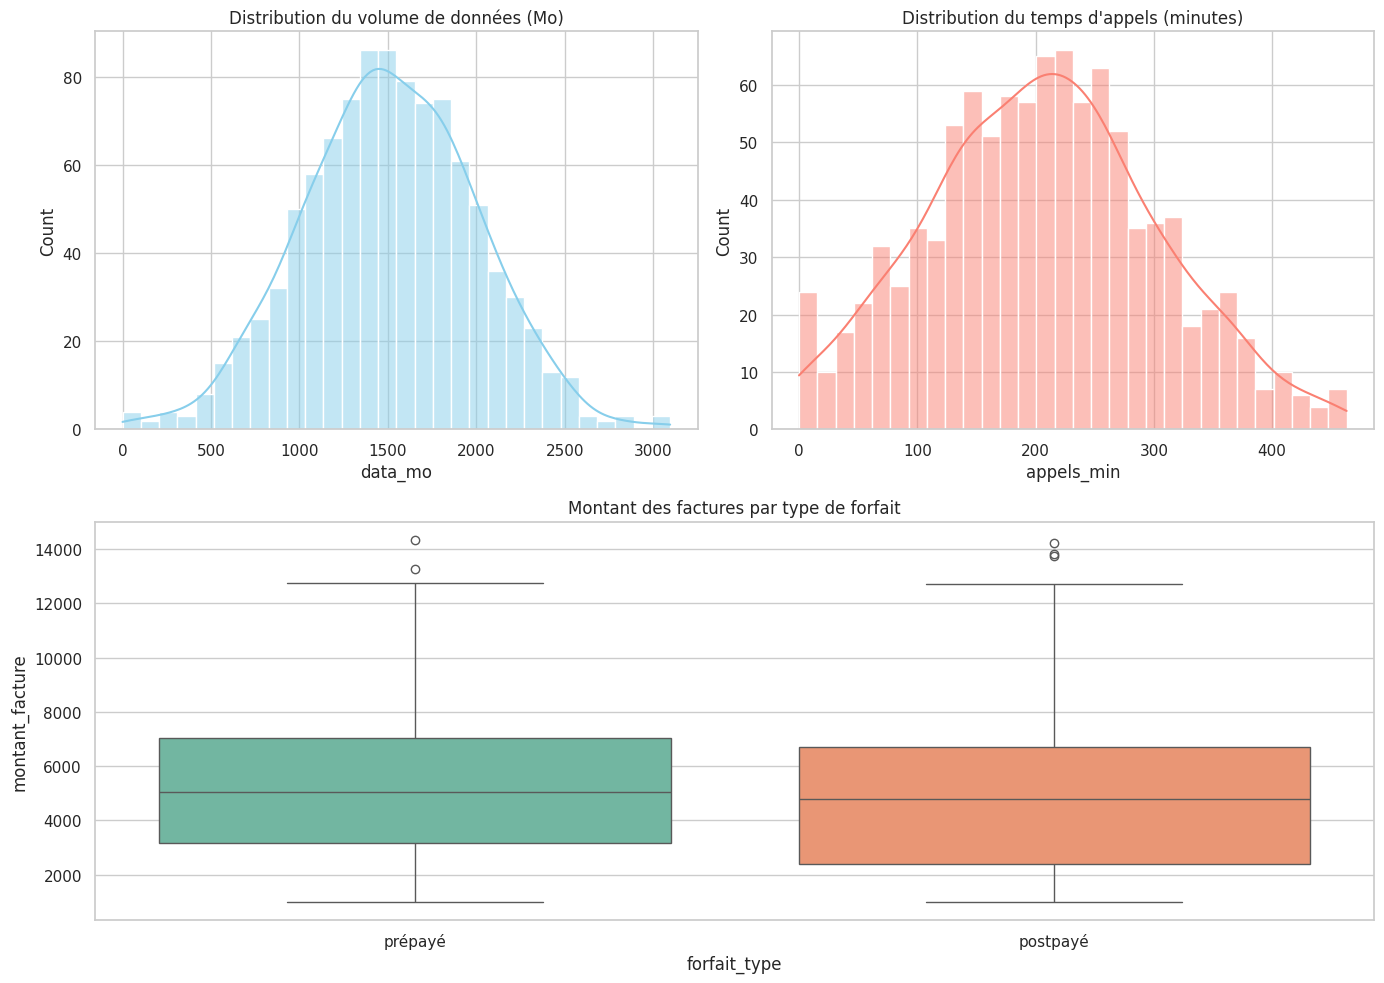

In [30]:
plt.figure(figsize=(14, 10))

# 1. Histogramme du volume data
plt.subplot(2, 2, 1)
sns.histplot(df['data_mo'], kde=True, bins=30, color='skyblue')
plt.title("Distribution du volume de données (Mo)")

# 2. Histogramme des minutes d'appel
plt.subplot(2, 2, 2)
sns.histplot(df['appels_min'], kde=True, bins=30, color='salmon')
plt.title("Distribution du temps d'appels (minutes)")

# 3. Boxplot du montant par forfait
plt.subplot(2, 1, 2)
sns.boxplot(x='forfait_type', y='montant_facture', data=df, palette='Set2')
plt.title("Montant des factures par type de forfait")

plt.tight_layout()
plt.show()


Répartition des clients par région, type de forfait, etc.

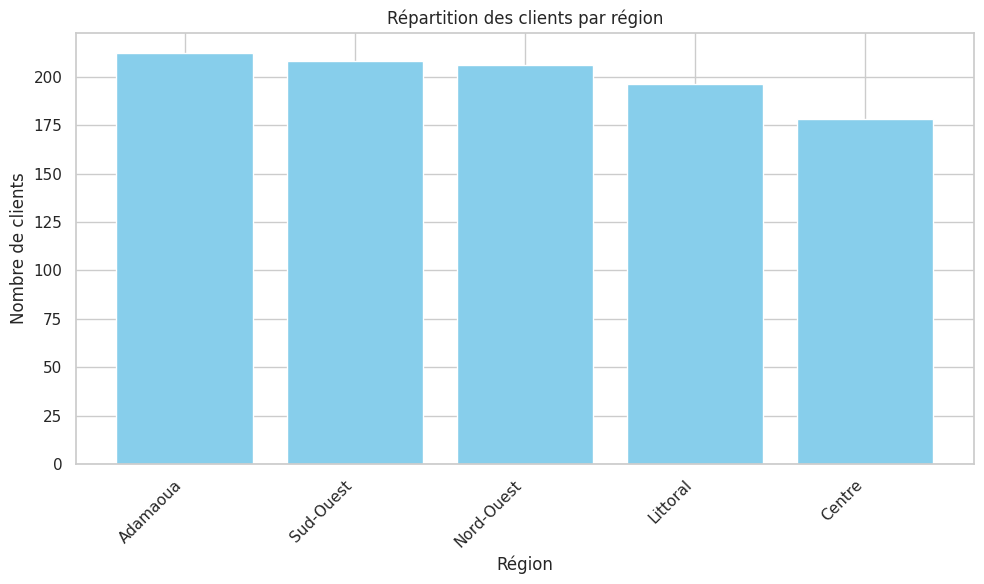

In [31]:

# Préparation de la colonne région
df['region'] = df['region'].fillna('Inconnue').str.strip().str.title()

# Calcul du nombre de clients par région
clients_par_region = df.groupby('region').size().reset_index(name='nombre_clients').sort_values(by='nombre_clients', ascending=False)

# Visualisation
plt.figure(figsize=(10,6))
plt.bar(clients_par_region['region'], clients_par_region['nombre_clients'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des clients par région")
plt.xlabel("Région")
plt.ylabel("Nombre de clients")
plt.tight_layout()
plt.show()


# Nouvelle section
**Clustering (KMeans)**

In [46]:


# Sélection des colonnes numériques pour clustering
features = ['age', 'appels_min', 'data_mo', 'sms_envoyes', 'montant_facture']
X = df[features]

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Appliquer une segmentation client (KMeans ou DBSCAN)

In [51]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

Visualiser les groupes (ex: via PCA ou t-SNE)

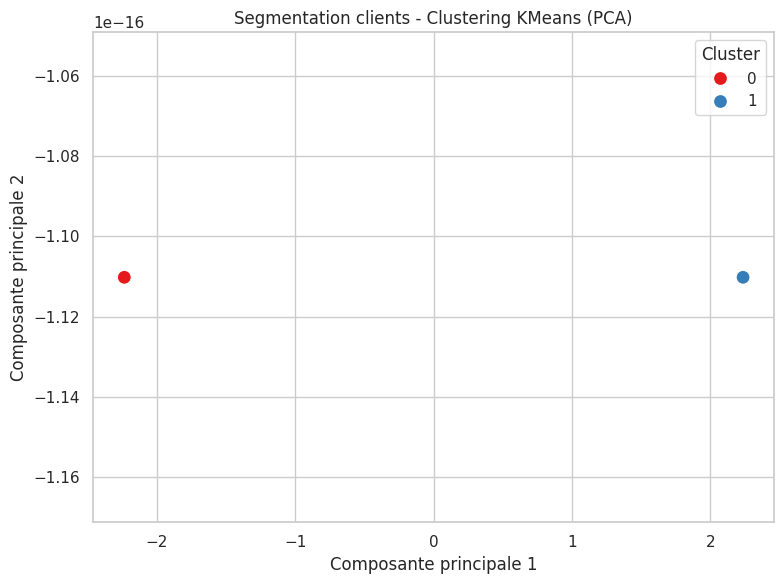

In [53]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set1', s=100)
plt.title("Segmentation clients - Clustering KMeans (PCA)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

# Nouvelle section
Recommandations stratégiques

Identifier les profils à fort potentiel (ex: fort usage data avec petit forfait)

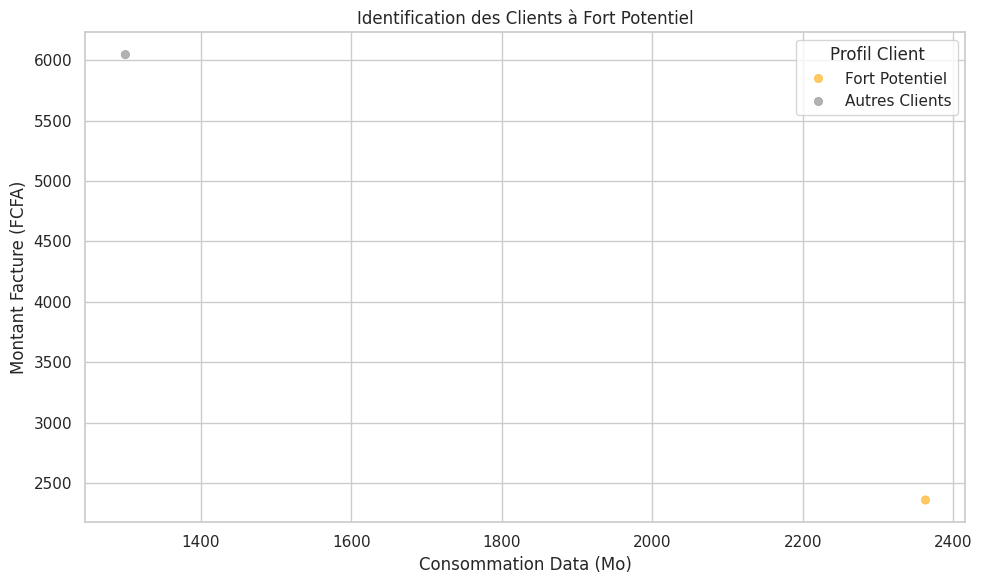

In [55]:

# Critères : Data élevée, facture basse, prépayé
# ------------------------------
df['fort_potentiel'] = (
    (df['data_mo'] > df['data_mo'].quantile(0.75)) &
    (df['montant_facture'] < df['montant_facture'].quantile(0.50)) &
    (df['forfait_type'] == 'prépayé')
)

# Ajouter une étiquette
df['profil'] = df['fort_potentiel'].apply(lambda x: 'Fort Potentiel' if x else 'Autres Clients')

# ------------------------------
# 4. Visualisation scatter : data vs facture
# ------------------------------
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='data_mo', y='montant_facture',
    hue='profil', palette={'Fort Potentiel': 'orange', 'Autres Clients': 'gray'},
    alpha=0.6, edgecolor=None
)
plt.title("Identification des Clients à Fort Potentiel")
plt.xlabel("Consommation Data (Mo)")
plt.ylabel("Montant Facture (FCFA)")
plt.legend(title="Profil Client")
plt.grid(True)
plt.tight_layout()
plt.show()

Recommander des actions marketing (offres ciblées, bonus SMS, migration prépayée vers postpayé...)

  Recommandations Marketing Stratégiques

 Objectif : Maximiser la valeur client à partir des données de consommation

1. Clients prépayés avec forte consommation de data mais faible facture

Profil : jeunes ou actifs digitaux qui utilisent intensément l’internet mobile, mais restent sur des forfaits basiques.

Recommandation :

Proposer une migration vers un forfait postpayé avec plus de data.

Offrir un bonus de bienvenue (ex : 1 Go gratuit ou 100 SMS offerts).

Mettre en place des campagnes ciblées par SMS ou app MyOrange.

2. Clients à usage équilibré (data + appels + SMS moyens)

Profil : utilisateurs réguliers mais pas intensifs.

Recommandation :

Maintenir l’offre actuelle mais proposer un surclassement léger (ex : +500 Mo pour 1 000 FCFA de plus).

Ajouter des recharges automatiques ou des packs “combo” pour simplifier leur expérience.

3. Clients avec faible consommation sur tous les canaux

Profil : utilisateurs peu actifs ou en voie de désengagement.

Recommandation :

Relancer via des offres ultra-basiques pour réactiver l’intérêt.

Cibler avec des messages sur des services à valeur ajoutée (vidéos éducatives, appels gratuits le week-end, etc.).

4. Clients très actifs et à forte valeur (data + appels + SMS + facture élevée)
Profil : clientèle hautement rentable mais exigeante.

Recommandation :

Proposer un programme de fidélité premium ou des offres VIP personnalisées.

Offrir un mois gratuit en cas d'engagement sur 6 ou 12 mois.

Prioriser ces clients pour le service client ou support prioritaire.

5. Clients âgés (60+) avec faible data mais bons volumes d'appels

Profil : clientèle plus âgée, attachée à la voix, peu portée sur internet.

Recommandation :

Offrir des forfaits “seniors” avec appels illimités + assistance gratuite.

Envoyer des SMS éducatifs pour l’initiation aux services digitaux.

